<a href="https://colab.research.google.com/github/SiddativeG/Marketing-Research-Models/blob/main/Reddit_Sentiment_Analysis_Uber_Drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw
!pip install vaderSentiment
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Extracting 500 posts from r/uberdrivers...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




=== Analysis Results ===
Total posts analyzed: 500
Average sentiment score: 0.062

Post distribution by sentiment:
Positive posts (>0): 268
Neutral posts (=0): 96
Negative posts (<0): 136


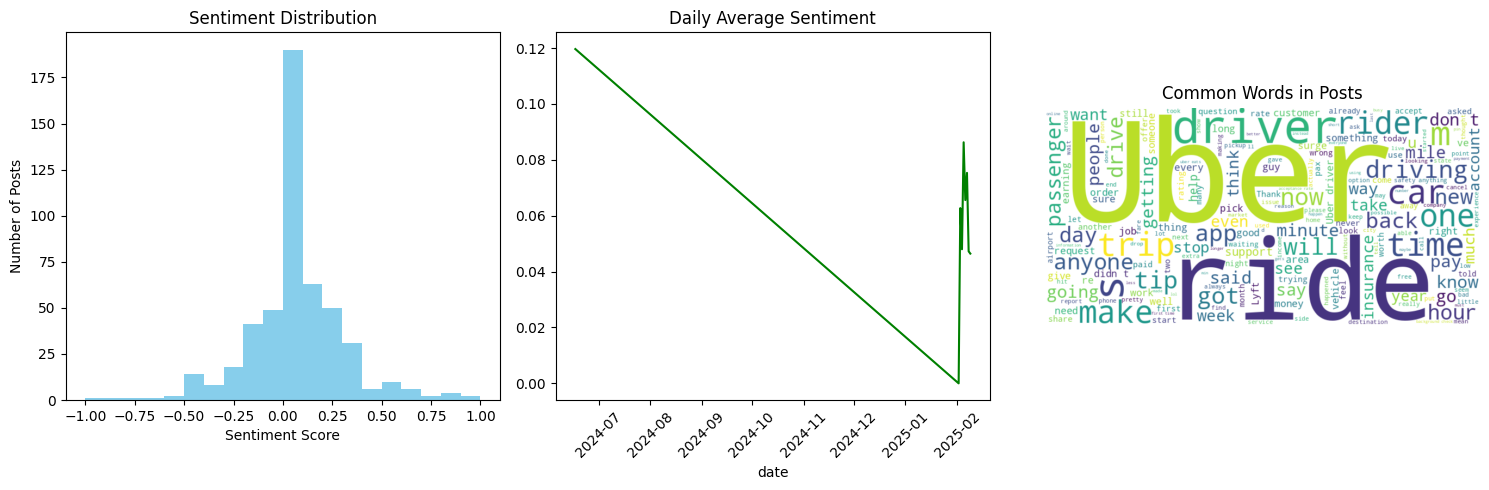


Data saved to uber_drivers_reddit_analysis.csv

Top 5 Most Discussed Posts:
                                                  title  comms_num  sentiment
393                        Overweight Rapper will lose.        295   0.112500
143                                Hey Shit 💩 happens….        234  -0.200000
455                             Would you take this?! 😆        167   0.061111
155  Uber is the worst "job" I've ever seen in my life.        140  -0.342593
1                               Absolutely unacceptable        132   0.356641


In [ ]:
# Install required packages
!pip install praw pandas textblob wordcloud matplotlib

# Import required libraries
import praw
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Initialize Reddit API connection
reddit = praw.Reddit(
    client_id='59gtBzmRPZG38tJ6Uzzd_Q',
    client_secret='CQ279LuraiXijm1dbd3zpfgL9WArmA',
    user_agent='personal use script for r/uberdrivers analysis by u/CulturalTax5763'
)

# Function to get sentiment scores
def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

# Function to extract posts
def extract_posts(subreddit_name, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    posts_dict = {
        "title": [],
        "score": [],
        "id": [],
        "url": [],
        "comms_num": [],
        "created": [],
        "body": [],
        "sentiment": []
    }

    print(f"Extracting {limit} posts from r/{subreddit_name}...")

    for post in subreddit.hot(limit=limit):
        try:
            # Extract post data
            posts_dict["title"].append(post.title)
            posts_dict["score"].append(post.score)
            posts_dict["id"].append(post.id)
            posts_dict["url"].append(post.url)
            posts_dict["comms_num"].append(post.num_comments)
            posts_dict["created"].append(datetime.datetime.fromtimestamp(post.created))
            posts_dict["body"].append(post.selftext)

            # Calculate sentiment
            combined_text = str(post.title) + " " + str(post.selftext)
            posts_dict["sentiment"].append(get_sentiment(combined_text))
        except Exception as e:
            print(f"Error processing post: {e}")
            continue

    return pd.DataFrame(posts_dict)

# Main execution
try:
    # Extract data
    df = extract_posts('uberdrivers', limit=500)

    # Basic analysis
    print("\n=== Analysis Results ===")
    print(f"Total posts analyzed: {len(df)}")
    print(f"Average sentiment score: {df['sentiment'].mean():.3f}")
    print("\nPost distribution by sentiment:")
    print(f"Positive posts (>0): {len(df[df['sentiment'] > 0])}")
    print(f"Neutral posts (=0): {len(df[df['sentiment'] == 0])}")
    print(f"Negative posts (<0): {len(df[df['sentiment'] < 0])}")

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # Sentiment Distribution
    plt.subplot(1, 3, 1)
    plt.hist(df['sentiment'], bins=20, color='skyblue')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Number of Posts')

    # Time series analysis
    plt.subplot(1, 3, 2)
    df['date'] = pd.to_datetime(df['created']).dt.date
    daily_sentiment = df.groupby('date')['sentiment'].mean()
    daily_sentiment.plot(color='green')
    plt.title('Daily Average Sentiment')
    plt.xticks(rotation=45)

    # Word Cloud
    plt.subplot(1, 3, 3)
    text = ' '.join(df['title'] + ' ' + df['body'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Common Words in Posts')

    plt.tight_layout()
    plt.show()

    # Save results
    output_file = 'uber_drivers_reddit_analysis.csv'
    df.to_csv(output_file, index=False)
    print(f"\nData saved to {output_file}")

    # Show top posts by engagement
    print("\nTop 5 Most Discussed Posts:")
    top_posts = df.nlargest(5, 'comms_num')[['title', 'comms_num', 'sentiment']]
    print(top_posts.to_string())

except Exception as e:
    print(f"An error occurred: {e}")